In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [7]:
train = pd.read_csv('wine-training-data.csv')
test = pd.read_csv('wine-evaluation-data.csv')

# Drop the index column
train = train.drop('INDEX', axis=1)
train.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [8]:
# Explore missing values
print(train.isnull().sum())

TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


In [10]:
imputer = SimpleImputer(strategy='mean')
train_imputed = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)

In [11]:
# Explore missing values
print(train_imputed.isnull().sum())

TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64


In [12]:
# Explore the distribution of the target variable
print(train_imputed['TARGET'].describe())

count    12795.000000
mean         3.029074
std          1.926368
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: TARGET, dtype: float64


In [13]:
# Split data into features and target variable
X = train_imputed.drop('TARGET', axis=1)
y = train_imputed['TARGET']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a count regression model (you may choose a different model)
model = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Poisson()).fit()

# Make predictions on the test set
predictions = model.predict(sm.add_constant(X_test))

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print(model.summary())

Mean Squared Error: 2.6327283845678275
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                10236
Model:                            GLM   Df Residuals:                    10221
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20197.
Date:                Sun, 17 Dec 2023   Deviance:                       14823.
Time:                        23:14:51   Pearson chi2:                 9.87e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2882
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [21]:
# Remove variables with high p-values (e.g., > 0.05)
variables_to_remove = ['FixedAcidity', 'ResidualSugar', 'CitricAcid', 'Density' ]  # Remove variables with p-value > 0.05
X_train_optimized = X_train.drop(variables_to_remove, axis=1)
X_test_optimized = X_test.drop(variables_to_remove, axis=1)

# Build the optimized model
optimized_model = sm.GLM(y_train, sm.add_constant(X_train_optimized), family=sm.families.Poisson()).fit()

# Make predictions on the test set
predictions_optimized = optimized_model.predict(sm.add_constant(X_test_optimized))

# Evaluate the optimized model
print("Optimized Model Mean Squared Error:", mean_squared_error(y_test, predictions_optimized))
print(optimized_model.summary())

Optimized Model Mean Squared Error: 2.633576306460514
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                10236
Model:                            GLM   Df Residuals:                    10225
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20202.
Date:                Sun, 17 Dec 2023   Deviance:                       14833.
Time:                        23:26:45   Pearson chi2:                 9.87e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2875
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

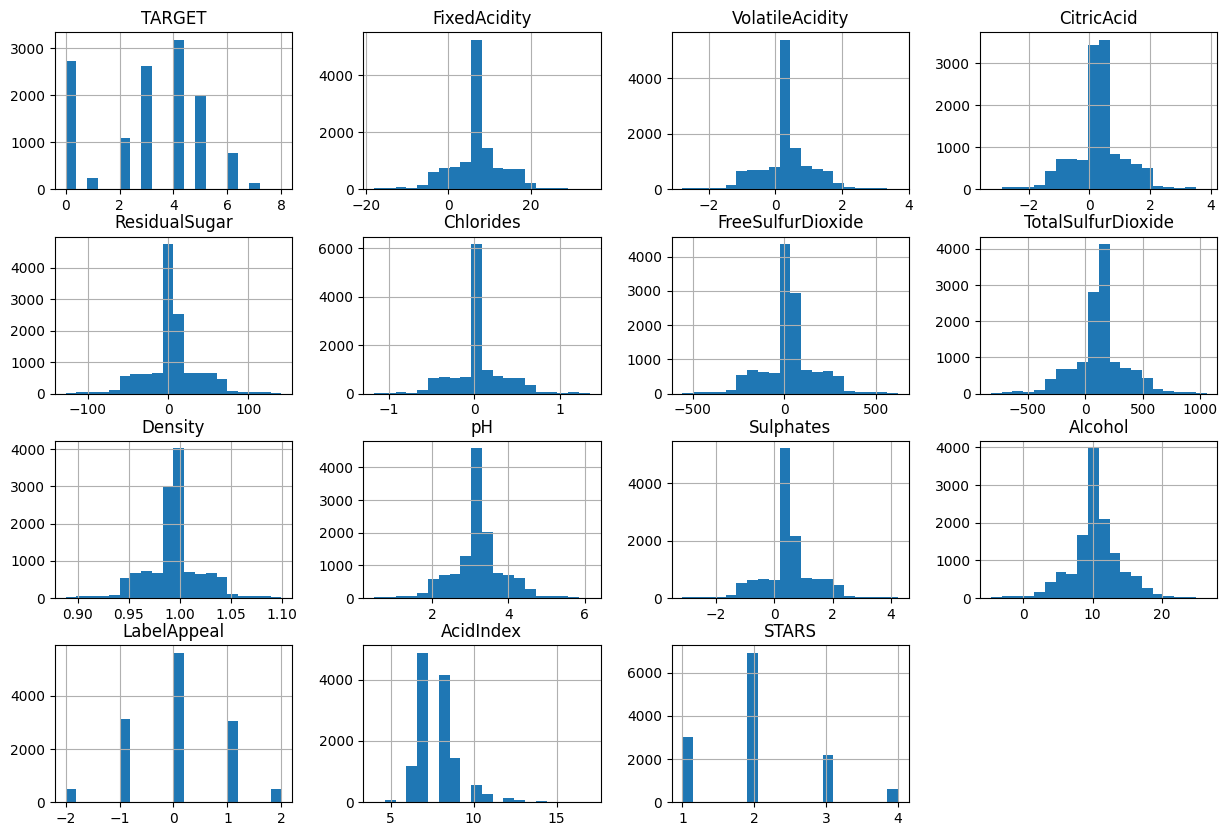

In [15]:
train_imputed.hist(bins=20, figsize=(15, 10))
plt.show()

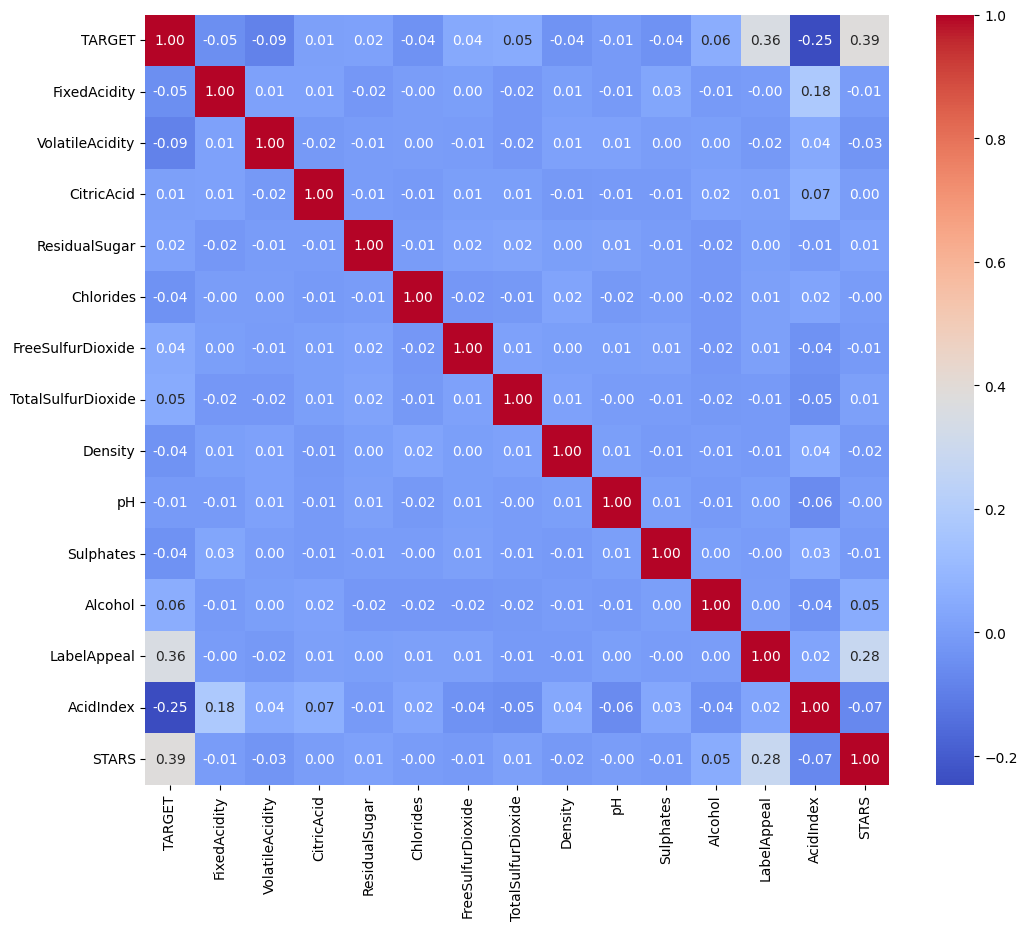

In [16]:
correlation_matrix = train_imputed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

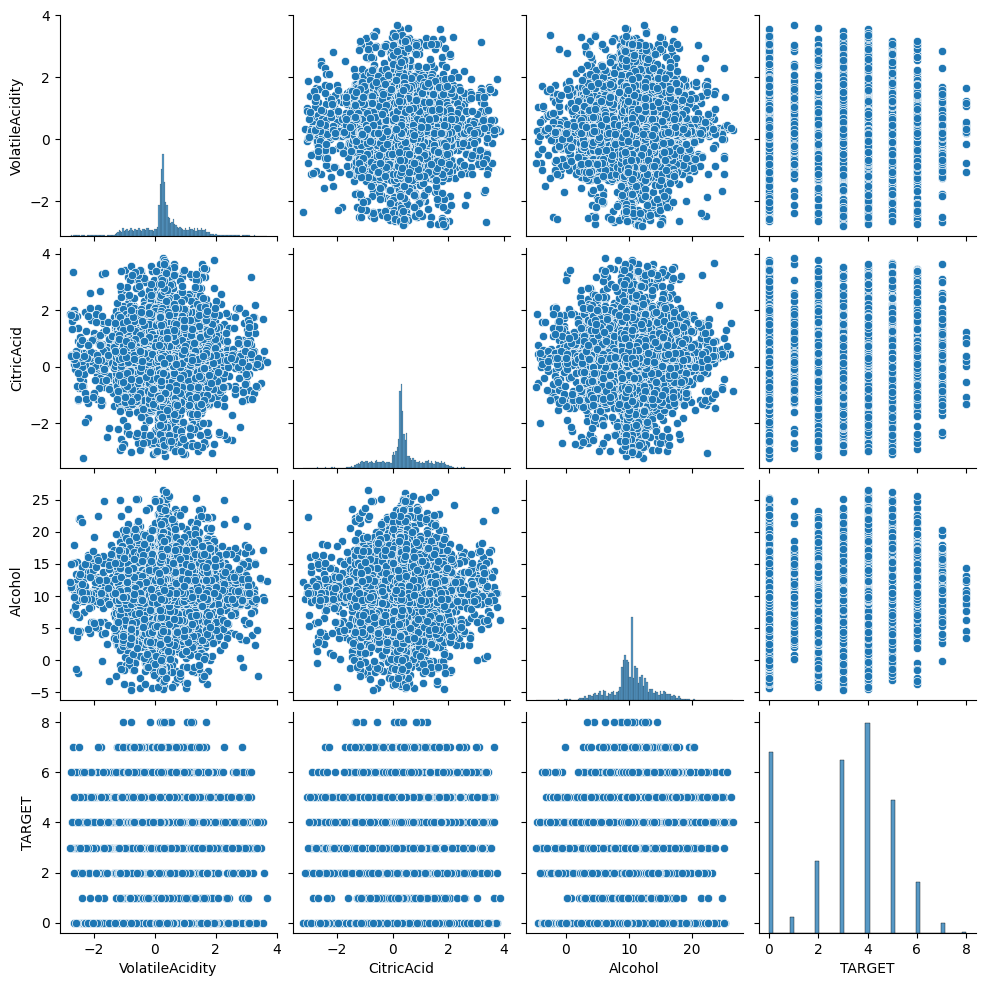

In [17]:
sns.pairplot(train_imputed, vars=['VolatileAcidity', 'CitricAcid', 'Alcohol', 'TARGET'])
plt.show()


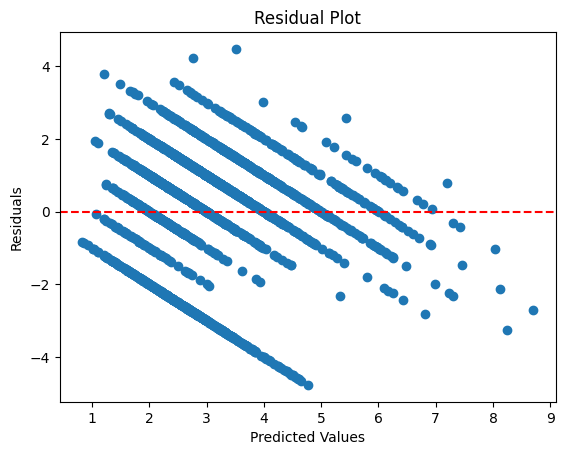

In [18]:
residuals = y_test - predictions_optimized
plt.scatter(predictions_optimized, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


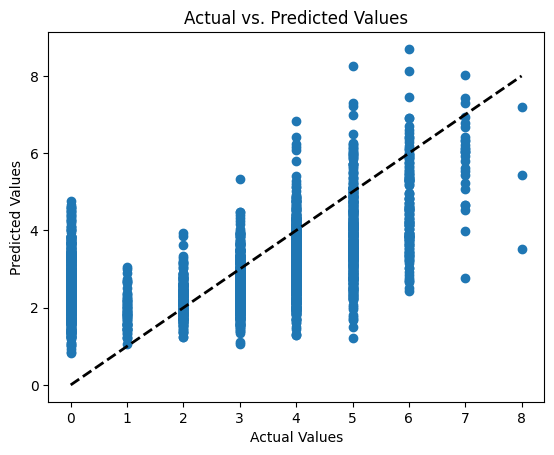

In [20]:
plt.scatter(y_test, predictions_optimized)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
